In [26]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

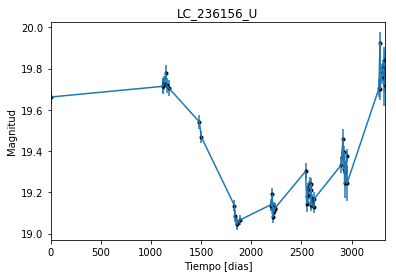

In [2]:
data = np.genfromtxt('LC_236156_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_236156_U')
plt.savefig("LC_236156_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

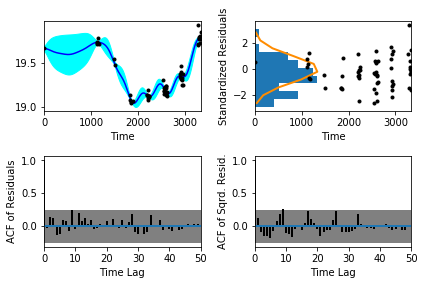

In [5]:
sample.assess_fit()

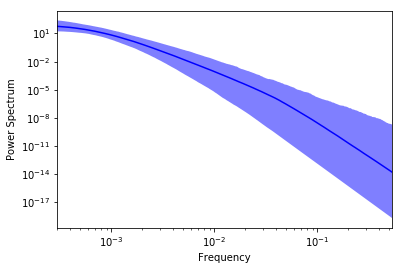

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

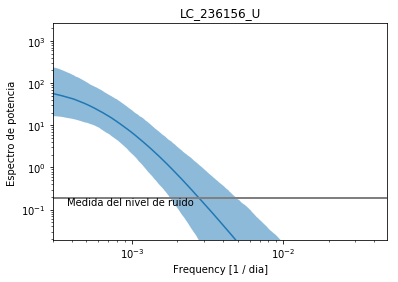

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_236156_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_236156_U')

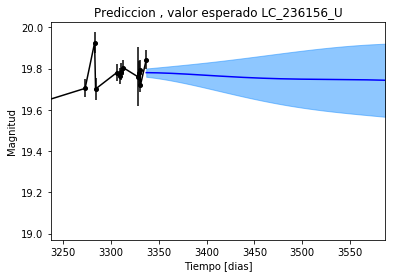

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_236156_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_236156_U')

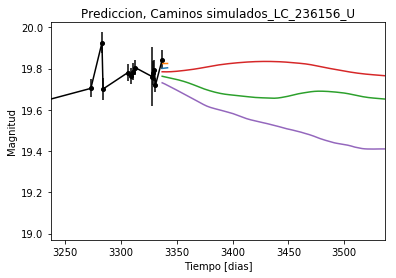

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_236156_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


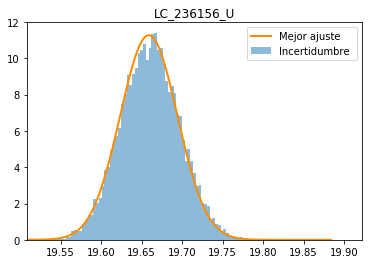

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_236156_U')
plt.savefig("Mejor_ajuste_LC_236156_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_236156_U')

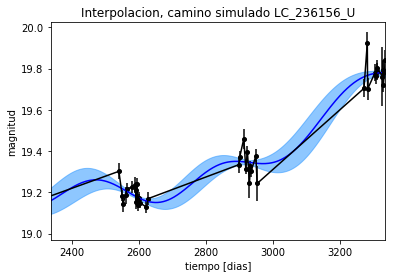

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_U')

Text(0.5,1,'Interpolacion, camino simulado LC_236156_U')

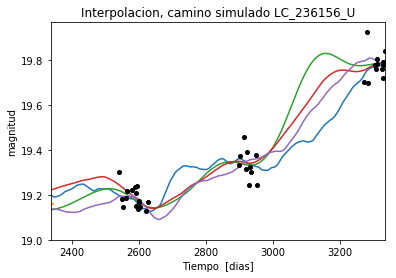

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1559.47246248
Median: 0.0125863630549
Standard deviation: 0.222641452181
68% credibility interval: [ 0.00087768  0.24915259]
95% credibility interval: [  3.43720365e-04   8.48698436e-01]
99% credibility interval: [  3.08034184e-04   1.02773891e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1715.72006862
Median: 0.000812997538811
Standard deviation: 0.0888183366742
68% credibility interval: [ 0.00038199  0.00716757]
95% credibility interval: [ 0.00030991  0.22435472]
99% credibility interval: [  3.02137512e-04   7.48284709e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 688.432752281
Median: 0.00791265613207
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1749.8854604
Median: 109.463109626
Standard deviation: 1.44097974182
68% credibility interval: [ 107.80720999  110.44724396]
95% credibility interval: [ 105.51763723  110.97379548]
99% credibility interval: [ 103.69852922  111.14876953]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1678.46695085
Median: 0.538411015437
Standard deviation: 2.0829103031
68% credibility interval: [ 0.04727994  3.36081759]
95% credibility interval: [ 0.01197114  6.94811682]
99% credibility interval: [  9.00336102e-03   1.06954769e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 538.765717225
Median: 0.109112530726
Standard deviation: 7.74564843696
68% credibility interval: [ 0.00564743  2.61096609]
95% credibility interval: [  5.91

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2936.10839941
Median: 3.14269243989e-32
Standard deviation: 8.43328450126e+59
68% credibility interval: [  1.86757690e-61   3.52146273e-09]
95% credibility interval: [  2.74634601e-124   2.62391817e+000]
99% credibility interval: [  5.93423111e-149   1.51066091e+003]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3359.99648695
Median: 19.5062025367
Standard deviation: 0.173037842014
68% credibility interval: [ 19.36437684  19.66947092]
95% credibility interval: [ 19.19851889  19.88371518]
99% credibility interval: [ 19.03130203  20.08004598]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 360.638002128
Median: 0.0
Standard deviation: 0.199109367632
68% credibility interval: [ 0.         0.1288793]
95% credibility interval: [ 0.          0.79977824]
99% credibility interval: [ 0.          0.98342049]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 360.638002128
Median: 0.0
Standard deviation: 0.199109367632
68% credibility interval: [ 0.         0.1288793]
95% credibility interval: [ 0.          0.79977824]
99% credibility interval: [ 0.          0.98342049]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 290.044285827
Median: 0.0
Standard deviation: 0.000187104710318
68% credibility interval: [ 0.    

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1749.8854604
Median: 109.463109626
Standard deviation: 1.44097974182
68% credibility interval: [ 107.80720999  110.44724396]
95% credibility interval: [ 105.51763723  110.97379548]
99% credibility interval: [ 103.69852922  111.14876953]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2441.64087464
Median: 0.0885346782132
Standard deviation: 0.0943209744536
68% credibility interval: [ 0.05197334  0.16897287]
95% credibility interval: [ 0.03228916  0.35311937]
99% credibility interval: [ 0.02561865  0.55386999]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1751.55720417
Median: 1.28501627548
Standard deviation: 0.191553250011
68% credibility interval: [ 1.11018518  1.49060767]
95% credibility interval: [ 0.98578018  1.73315669]
99% credibility interval: [ 0.89937674  1.86020853]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1417.03246715
Median: 1.56828961992e-05
Standard deviation: 0.00692730295312
68% credibility interval: [  6.89906397e-07   4.15394876e-04]
95% credibility interval: [  4.62074248e-08   5.30127964e-03]
99% credibility interval: [  2.67144861e-09   1.24015112e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1559.47246248
Median: (-0.0790824514176+0j)
Standard deviation: 1.87670400849
68% credibility interval: [-1.56547192+0.j         -0.00551460-0.01838469j]
95% credibility interval: [ -5.33252954e+00+0.j          -2.15965875e-03-0.16528424j]
99% credibility interval: [ -6.45747400e+00+0.j          -1.93543586e-03-0.00377833j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1715.72006862
Median: (-0.00510821419063+0j)
Standard deviation: 1.36986750768
68% credibility interval: [-0.04503518+0.02242286j -0.00240014+0.00333442j]
95% credibility interval: [-1.40966228+3.09168544j -0.00194719+0.j        ]
99% credibility interval: [ -4.70161149e+00+5.14257121j  -1.89838598e-03+0.j        ]
Posterior summary for parameter ar_ro